In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
#import missingno as ms

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
df=pd.read_csv("D:\HTM\diabities.csv")

In [31]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [33]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [34]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [35]:
#ms.matrix(df.corr())

<AxesSubplot:>

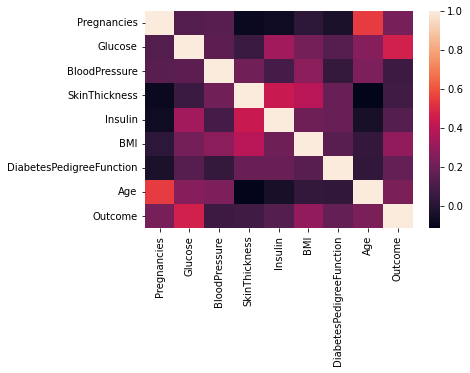

In [36]:
sns.heatmap(df.corr())

In [37]:
df.drop('Pregnancies',axis=1,inplace=True)
df.drop('SkinThickness',axis=1,inplace=True)

In [38]:
df.head()

,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,0,33.6,0.627,50,1
1,85,66,0,26.6,0.351,31,0
2,183,64,0,23.3,0.672,32,1
3,89,66,94,28.1,0.167,21,0
4,137,40,168,43.1,2.288,33,1


In [39]:

x_train,x_test,y_train,y_test=train_test_split(df.drop('Outcome',axis=1),df['Outcome'],test_size=0.05,random_state=11)

In [40]:
from sklearn import ensemble
model = ensemble.RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [41]:
y_pred=model.predict(x_test)
print(y_pred)
print(y_test)

[0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1
 0 1]
210    0
340    0
649    0
477    0
432    0
60     0
341    0
278    0
153    0
46     0
474    0
671    0
433    0
424    1
66     1
571    0
522    0
143    1
148    0
545    1
533    0
25     1
221    1
576    0
135    0
121    0
573    0
447    0
295    0
92     0
607    0
317    1
510    1
268    0
73     0
636    0
728    0
168    0
217    0
Name: Outcome, dtype: int64


C:\Users\N YASWANTH KUMAR\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


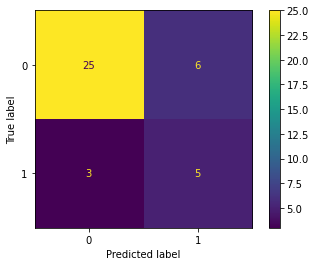

In [42]:
from sklearn import metrics
metrics.plot_confusion_matrix(model,x_test,y_test)

In [43]:
from sklearn.metrics import accuracy_score
er=accuracy_score(y_test,y_pred)
print(er)

0.7692307692307693


In [44]:
import pickle
pickle.dump(model,open('diabetes.pkl','wb'))